# Compare Result

this notebook created for comparing result between predicted result from ML model and truth set 

In [1]:
!pip install venn

In [2]:
from venn import venn
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from functools import reduce

In [2]:
columns = ["ID_Query","ID_Target","sequence_identity","alignment_length","number_of_mismatches","number_of_gap_openings", "start-position_in_query", "end-position_in_query", "start-position_in_target","end-position_in_target","E-value","bit_score"]

<AxesSubplot:>

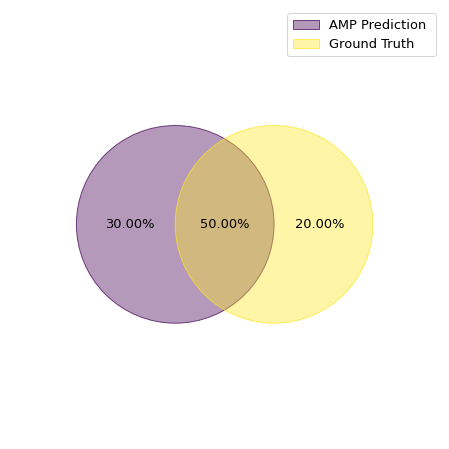

In [31]:

from venn import venn
%matplotlib inline

musicians = {
    "AMP Prediction ": {"A","B","C","D","E","F","G","Z"},
    "Ground Truth": {"A","B","C","D","E","H","I"}
}
venn(musicians, fmt="{percentage:.2f}%")

## RAT

In [95]:
rat_ML =  pd.read_pickle("/mnt/vdb/Rat/cd100/result/Rat.len15.MLResult.plk")
rat_ML

,ID,class
0,0,1
1,1,0
2,2,0
3,3,0
4,5,0
...,...,...
1049,311701,0
1050,311702,0
1051,311703,0
1052,311705,0


In [96]:
rat_read_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/rat.alnRes.m8.len15.tsv",
                                   encoding = "ISO-8859-1", sep='\t',header=0)
RAT_total_AMPS = len(rat_read_len15_truth['ID_Query'].unique())
print(RAT_total_AMPS)
rat_read_len15_truth

297


,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,22451,ADAM_1534|adam_test,1.000,28,0,0,1,28,122,149,1.071000e-16,67
1,22451,dbAMP_02476,0.730,26,7,0,1,26,123,148,3.445000e-10,49
2,22451,dbAMP_07555,0.576,26,11,0,1,26,112,137,2.200000e-08,44
3,22451,ADAM_0751|adam_test,0.576,26,11,0,1,26,122,147,2.200000e-08,44
4,12362,463_pos_train_ds3|pos_train_ds3,1.000,21,0,0,1,21,28,48,5.222000e-09,45
...,...,...,...,...,...,...,...,...,...,...,...,...
1536,46405,E07168|Hemoglobin,0.882,17,2,0,4,20,1,17,2.130000e-06,37
1537,46405,2650_dbaasp|dbaasp_peptides,0.882,17,2,0,4,20,1,17,2.130000e-06,37
1538,46405,dbAMP_11841,0.700,20,6,0,1,20,30,49,4.041000e-06,36
1539,46405,E06700|Hemoglobin,0.933,15,1,0,6,20,1,15,7.666000e-06,36


<AxesSubplot:>

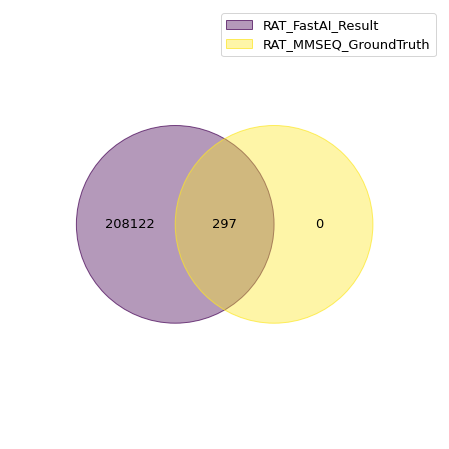

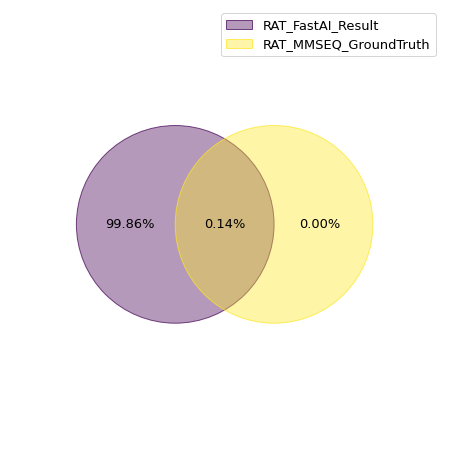

In [97]:
RATSamples = {
    "RAT_FastAI_Result":  set(rat_ML["ID"]),
    "RAT_MMSEQ_GroundTruth": set(rat_read_len15_truth['ID_Query']),
}
venn(RATSamples)
venn(RATSamples, fmt="{percentage:.2f}%")


<AxesSubplot:>

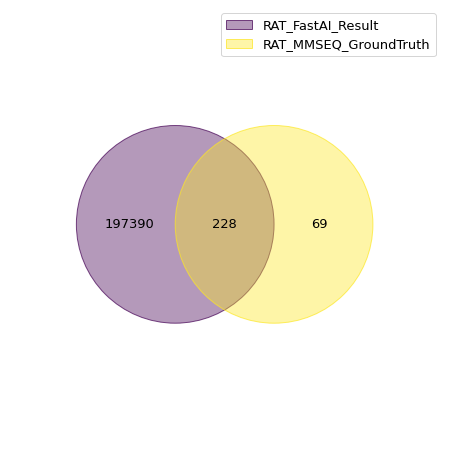

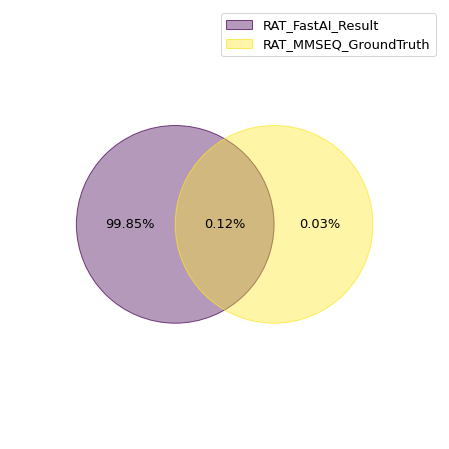

In [98]:
rat_AMPs_ML= rat_ML[rat_ML["class"] == 0]
RATSamples = {
    "RAT_FastAI_Result":  set(rat_AMPs_ML["ID"]),
    "RAT_MMSEQ_GroundTruth": set(rat_read_len15_truth['ID_Query']),
}
venn(RATSamples)
venn(RATSamples, fmt="{percentage:.2f}%")

78


<AxesSubplot:>

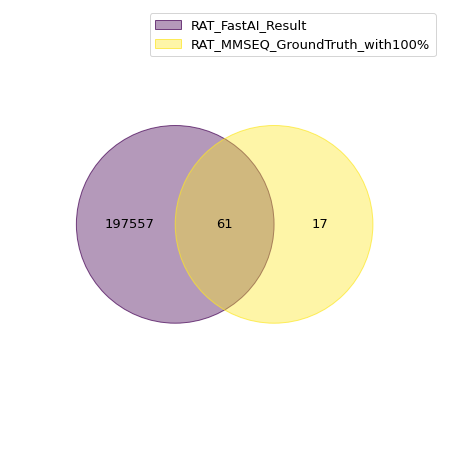

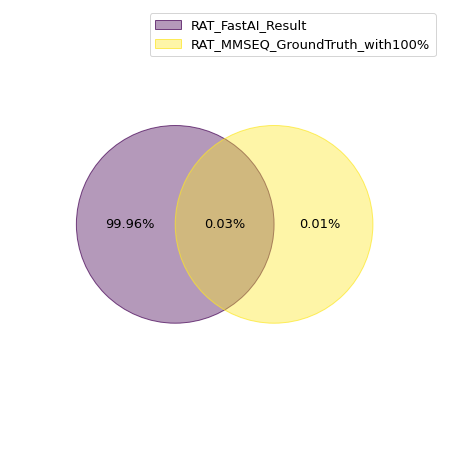

In [99]:
filtered_rat_read_len15_truth = rat_read_len15_truth[rat_read_len15_truth['sequence_identity'] == 1]
RAT_total_AMPS_with100 = len(filtered_rat_read_len15_truth['ID_Query'].unique())
print(RAT_total_AMPS_with100)
RATSamples = {
    "RAT_FastAI_Result":  set(rat_AMPs_ML["ID"]),
    "RAT_MMSEQ_GroundTruth_with100%": set(filtered_rat_read_len15_truth['ID_Query']),
}
venn(RATSamples)
venn(RATSamples, fmt="{percentage:.2f}%")


In [101]:
accuracy = (228/RAT_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (61/RAT_total_AMPS_with100 )*100
print("%.2f" % accuracy)

76.77
78.21


## Taiwanese Oolong 

Use 20 len produce highest AMPs

In [102]:
TaiOo_ML =  pd.read_pickle("/mnt/vdb/Taiwan/cd100/result/Taiwan.len20.MLResult.plk")
TaiOo_ML

,ID,class
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
107,1058123,0
108,1058124,1
109,1058125,1
110,1058126,0


In [103]:
TaiOo_len20_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/Oolong.len20.alnRes.m8.tsv",
                                encoding = "ISO-8859-1", sep='\t',header=0)
TaiOo_total_AMPS = len(TaiOo_len20_truth['ID_Query'].unique())
print(TaiOo_total_AMPS)
TaiOo_len20_truth

1400


,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,402729,2633_Hemolytik_allsequences|Hemolytik_allseque...,0.925,27,2,0,1,27,20,46,6.655000e-12,53
1,188032,1390_pos_train_ds3|pos_train_ds3,0.894,19,2,0,1,19,23,41,2.126000e-06,38
2,32533,2633_Hemolytik_allsequences|Hemolytik_allseque...,0.894,76,8,0,32,107,1,76,1.382000e-39,139
3,51175,dbAMP_09422,0.555,27,12,0,8,34,52,78,1.304000e-05,36
4,91622,1293_pos_train_ds3|pos_train_ds3,0.967,31,1,0,1,31,21,51,1.199000e-16,67
...,...,...,...,...,...,...,...,...,...,...,...,...
5144,681044,1007_pos_train_ds3|pos_train_ds3,0.606,33,13,0,1,33,23,55,1.376000e-07,42
5145,681044,1108_pos_train_ds3|pos_train_ds3,0.575,33,14,0,1,33,32,64,2.612000e-07,41
5146,681044,1146_pos_train_ds3|pos_train_ds3,0.575,33,14,0,1,33,24,56,2.612000e-07,41
5147,681044,1401_pos_train_ds3|pos_train_ds3,0.606,33,13,0,1,33,24,56,3.600000e-07,40


<AxesSubplot:>

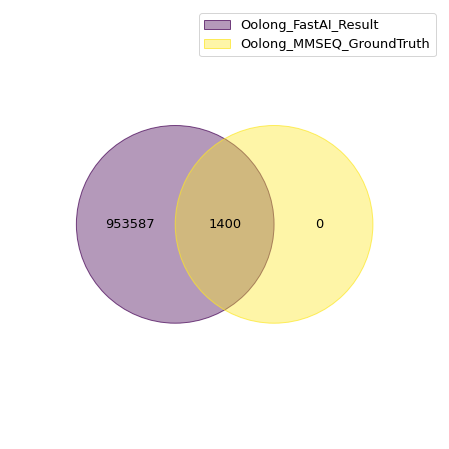

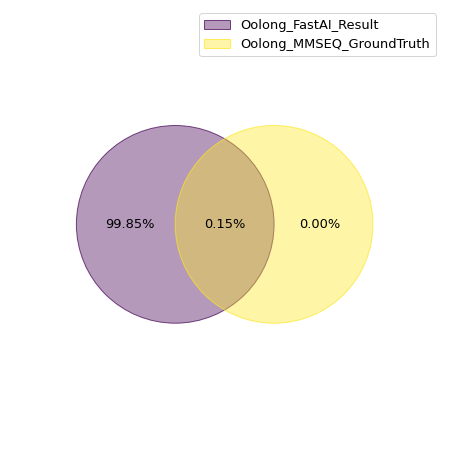

In [104]:
TaiOoSamples = {
    "Oolong_FastAI_Result":  set(TaiOo_ML["ID"]),
    "Oolong_MMSEQ_GroundTruth": set(TaiOo_len20_truth['ID_Query']),
}
venn(TaiOoSamples)
venn(TaiOoSamples, fmt="{percentage:.2f}%")

<AxesSubplot:>

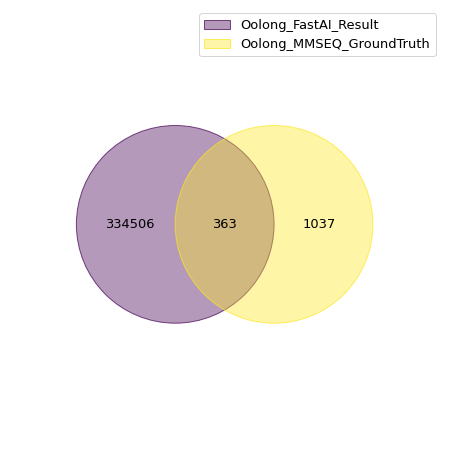

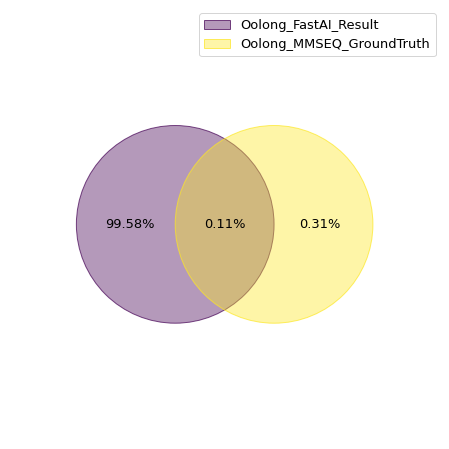

In [105]:
TaiOo_AMPs_ML= TaiOo_ML[TaiOo_ML["class"] == 0]
TaiOo_AMPs_ML
TaiOoSamples = {
    "Oolong_FastAI_Result":  set(TaiOo_AMPs_ML["ID"]),
    "Oolong_MMSEQ_GroundTruth": set(TaiOo_len20_truth['ID_Query']),
}
venn(TaiOoSamples)
venn(TaiOoSamples, fmt="{percentage:.2f}%")

182


<AxesSubplot:>

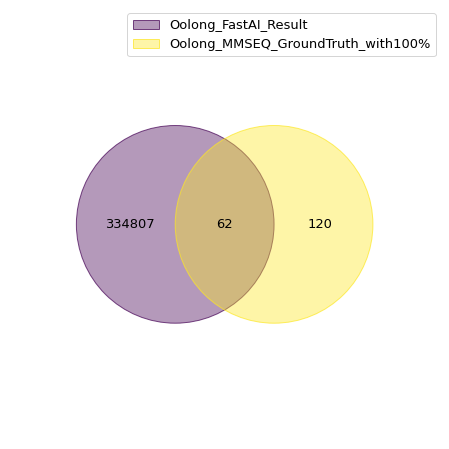

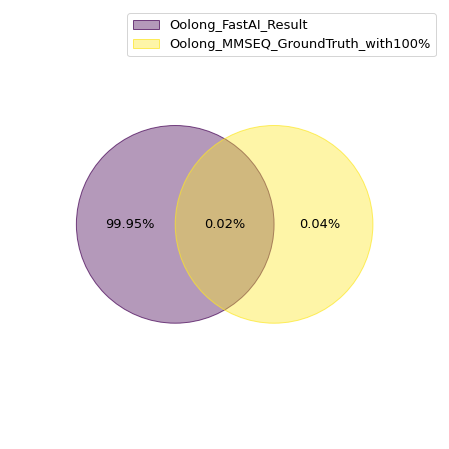

In [155]:
filtered_TaiOo_len20_truth = TaiOo_len20_truth[TaiOo_len20_truth['sequence_identity'] == 1]
filtered_TaiOo_len20_len = len(filtered_TaiOo_len20_truth['ID_Query'].unique())
print(filtered_TaiOo_len20_len)
TaiOoSamples = {
    "Oolong_FastAI_Result":  set(TaiOo_AMPs_ML["ID"]),
    "Oolong_MMSEQ_GroundTruth_with100%": set(filtered_TaiOo_len20_truth['ID_Query']),
}
venn(TaiOoSamples)
venn(TaiOoSamples, fmt="{percentage:.2f}%")

In [108]:
accuracy = (363/TaiOo_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (62/filtered_TaiOo_len20_len )*100
print("%.2f" % accuracy)

25.93
34.07


In [ ]:
# ---------------------------------#

## DECockroach

In [149]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result/DECockroach.len15.MLResult.plk")
DECockroach_ML

,ID,class
0,0,0
1,1,0
2,3,0
3,4,1
4,5,0
...,...,...
199,894298,0
200,894299,0
201,894303,0
202,894304,0


In [150]:
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]
DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
DECockroach_len15_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,143923,dbAMP_12224,0.550,20,9,0,1,20,44,63,4.967000e-04,31
1,143923,L03A000107|,0.550,20,9,0,1,20,66,85,4.967000e-04,31
2,775878,420_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,7,23,2.010000e-08,43
3,775878,1676_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,32,48,2.010000e-08,43
4,775878,1653_peptideDB.anti|peptideDB.anti,0.882,17,2,0,1,17,32,48,2.010000e-08,43
...,...,...,...,...,...,...,...,...,...,...,...,...
4076,178554,EN95455285|A|P81709|Lysozyme,0.588,17,7,0,1,17,102,118,5.571000e-04,30
4077,178554,EN60134206|A|P37712|Lysozyme,0.666,15,5,0,1,15,102,116,5.571000e-04,30
4078,178554,EN84379296|A|Q659U1|Lysozyme,0.588,17,7,0,1,17,120,136,5.571000e-04,30
4079,178554,EN34191792|A|Q659U0|Lysozyme,0.588,17,7,0,1,17,120,136,5.571000e-04,30


<AxesSubplot:>

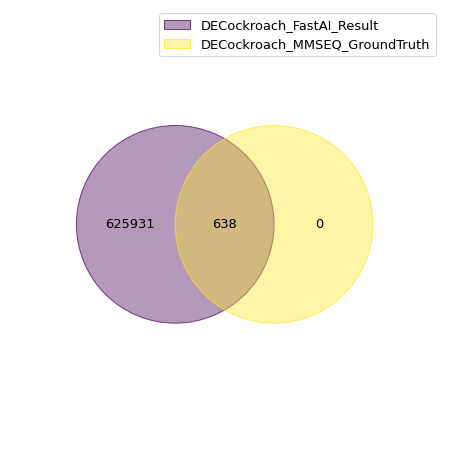

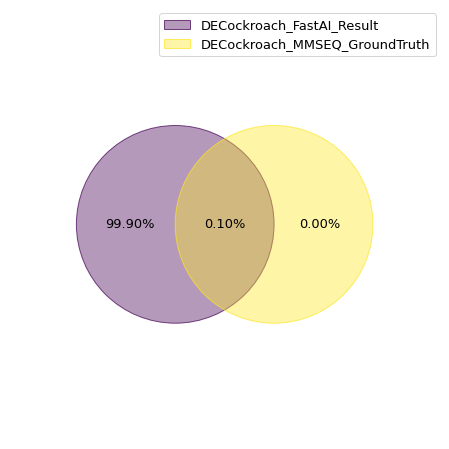

In [151]:
DECockroachSamples = {
    "DECockroach_FastAI_Result":  set(DECockroach_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

<AxesSubplot:>

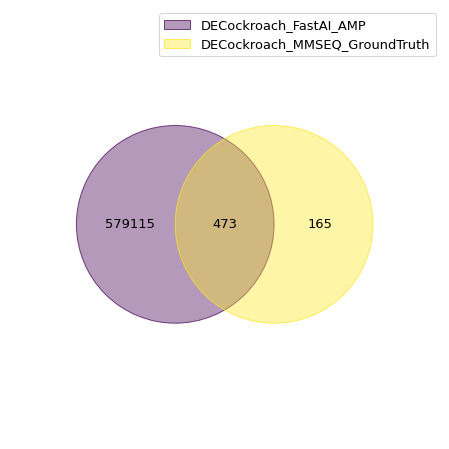

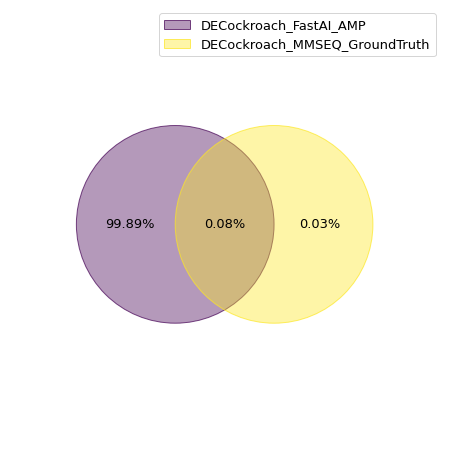

In [152]:
DECockroachSamples = {
    "DECockroach_FastAI_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [156]:
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
print(DECockroach_total_AMPS_with100)

77


<AxesSubplot:>

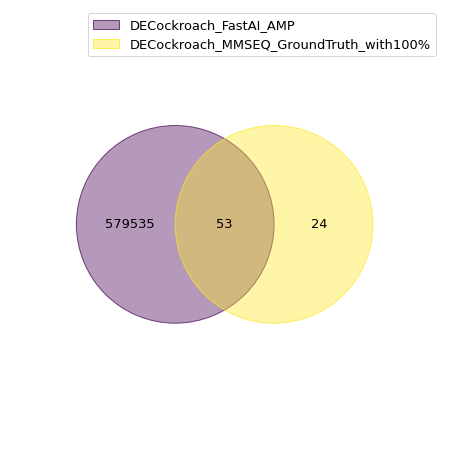

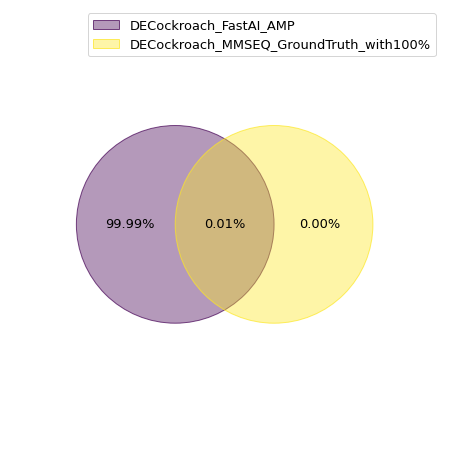

In [154]:
DECockroachSamples = {
    "DECockroach_FastAI_AMP":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth_with100%": set(filtered_DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [129]:
accuracy = (473/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)
accuracy = (53/DECockroach_total_AMPS_with100 )*100
print("%.2f" % accuracy)

74.14
68.83


In [ ]:
# ---------------------------------------

In [12]:
DECockroach_ML =  pd.read_pickle("/mnt/vdb/DECockroach/cd100/result/DECockroach.len15.MLResult.plk")
DECockroach_ML

,ID,class
0,0,0
1,1,0
2,3,0
3,4,1
4,5,0
...,...,...
199,894298,0
200,894299,0
201,894303,0
202,894304,0


In [52]:
DECockroach_len15_truth = pd.read_csv("/home/ubuntu/data/MMSeqs.alnRes/len15/DECockroach.alnRes.m8.len15.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
#DECockroach_len15_truth.columns = columns
DECockroach_len15_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,792259,E08707|Spleen,0.875,16,2,0,1,16,8,23,3.560000e-07,39
1,792259,E08714|Spleen,0.875,16,2,0,2,17,1,16,4.900000e-07,39
2,180767,AP02583|Defensin,0.714,14,4,0,1,14,50,63,2.130000e-04,31
3,180767,L05ADEF509|,0.692,13,4,0,2,14,26,38,4.040000e-04,31
4,823121,E22349|Antimicrobial,0.909,22,2,0,9,30,1,22,8.390000e-08,42
...,...,...,...,...,...,...,...,...,...,...,...,...
6469,530351,E08714|Spleen,1.000,16,0,0,16,31,1,16,1.130000e-07,43
6470,494399,10896_dbaasp|dbaasp_peptides,0.666,15,5,0,2,16,2,16,4.040000e-04,31
6471,494399,10897_dbaasp|dbaasp_peptides,0.666,15,5,0,2,16,4,18,5.570000e-04,30
6472,110985,dbAMP_12224,0.588,17,7,0,1,17,40,56,1.200000e-04,32


<AxesSubplot:>

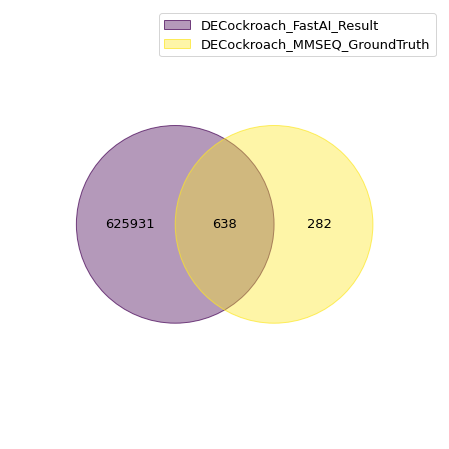

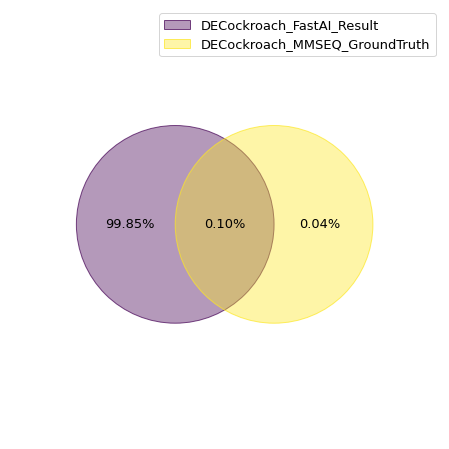

In [61]:
DECockroachSamples = {
    "DECockroach_FastAI_Result":  set(DECockroach_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [57]:
DECockroach_AMPs_ML= DECockroach_ML[DECockroach_ML["class"] == 0]

DECockroach_total_AMPS = len(DECockroach_len15_truth['ID_Query'].unique())
DECockroach_total_AMPS

920

<AxesSubplot:>

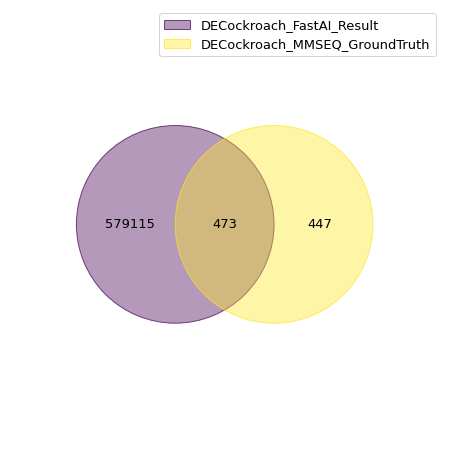

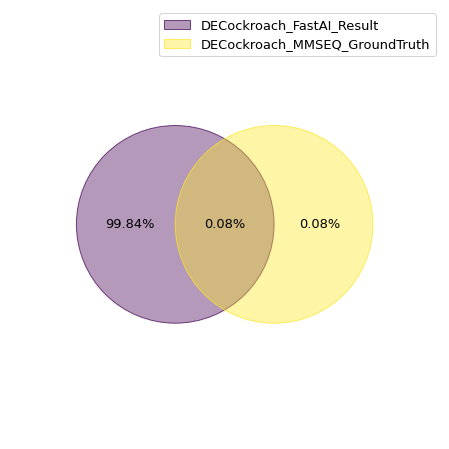

In [58]:
DECockroachSamples = {
    "DECockroach_FastAI_Result":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth": set(DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [59]:
accuracy = (473/DECockroach_total_AMPS )*100
print("%.2f" % accuracy)

51.41


## Identity 100% -> 1 

In [62]:
filtered_DECockroach_len15_truth = DECockroach_len15_truth[DECockroach_len15_truth['sequence_identity'] == 1]
filtered_DECockroach_len15_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
92,762315,2633_Hemolytik_allsequences|Hemolytik_allseque...,1.0,21,0,0,1,21,56,76,4.060000e-09,46
154,215096,E08714|Spleen,1.0,11,0,0,4,14,6,16,2.940000e-04,31
199,247213,E08707|Spleen,1.0,23,0,0,25,47,1,23,3.130000e-10,59
200,247213,E24697|Antifungal,1.0,22,0,0,84,105,1,22,1.170000e-06,48
201,247213,E08714|Spleen,1.0,16,0,0,33,48,1,16,3.440000e-05,43
...,...,...,...,...,...,...,...,...,...,...,...,...
6452,509601,E08707|Spleen,1.0,23,0,0,27,49,1,23,2.440000e-11,59
6453,509601,E24697|Antifungal,1.0,22,0,0,86,107,1,22,1.760000e-07,48
6454,509601,E08714|Spleen,1.0,16,0,0,35,50,1,16,6.640000e-06,43
6468,530351,E08707|Spleen,1.0,23,0,0,8,30,1,23,4.360000e-13,58


In [63]:
DECockroach_total_AMPS_with100 = len(filtered_DECockroach_len15_truth['ID_Query'].unique())
DECockroach_total_AMPS_with100

100

<AxesSubplot:>

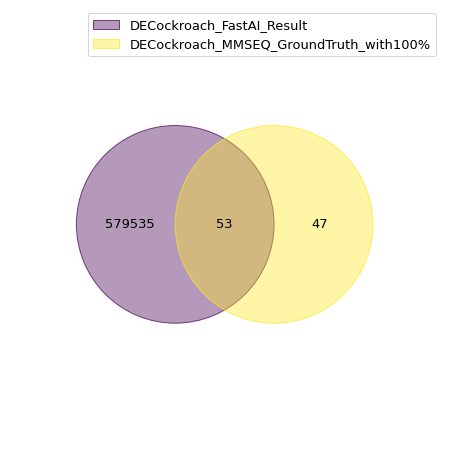

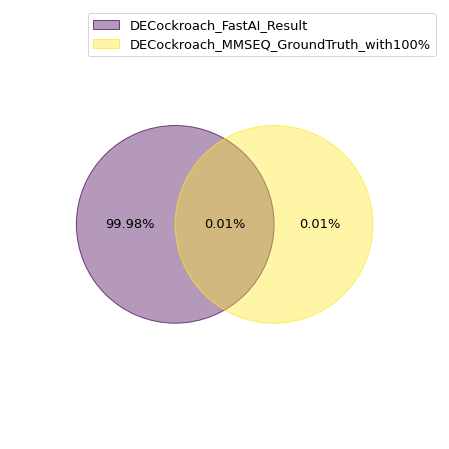

In [64]:
DECockroachSamples = {
    "DECockroach_FastAI_Result":  set(DECockroach_AMPs_ML["ID"]),
    "DECockroach_MMSEQ_GroundTruth_with100%": set(filtered_DECockroach_len15_truth['ID_Query']),
}
venn(DECockroachSamples)
venn(DECockroachSamples, fmt="{percentage:.2f}%")

In [65]:
accuracy = (53/DECockroach_total_AMPS_with100 )*100
print("%.2f" % accuracy)

53.00


## BAT

In [118]:
Bat_ML =  pd.read_pickle("/mnt/vdb/Bat/cd100/result/Bat.len10.MLResult.plk")
Bat_ML

,ID,class
0,9,1
1,19,0
2,32,1
3,54,1
4,61,1
...,...,...
74,12568817,1
75,12568833,1
76,12568849,1
77,12568850,1


In [117]:
Bat_len10_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/BAT.alnRes.m8.len10.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
Bat_total_AMPS = len(Bat_len10_truth['ID_Query'].unique())
Bat_len10_truth

,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,9406396,2633_Hemolytik_allsequences|Hemolytik_allseque...,0.973,76,2,0,8,83,1,76,9.915000e-44,150
1,8767410,AP02852|Human,0.830,100,17,0,81,179,41,140,1.819000e-43,153
2,766245,dbAMP_06762,0.446,120,65,0,501,619,226,345,3.371000e-26,113
3,3779279,dbAMP_10888,0.612,62,24,0,1,62,54,115,8.738000e-24,90
4,3779279,6440_dbaasp|dbaasp_peptides,0.923,39,3,0,25,63,1,39,1.654000e-19,78
...,...,...,...,...,...,...,...,...,...,...,...,...
32941,9063506,1298_pos_train_ds3|pos_train_ds3,0.627,51,19,0,44,94,2,52,6.849000e-18,75
32942,9063506,532_pos_train_ds3|pos_train_ds3,0.607,51,20,0,43,93,1,51,4.217000e-16,70
32943,9063506,531_pos_train_ds3|pos_train_ds3,0.607,51,20,0,43,93,1,51,5.790000e-16,69
32944,9063506,533_pos_train_ds3|pos_train_ds3,0.607,51,20,0,43,93,1,51,7.949000e-16,69


<AxesSubplot:>

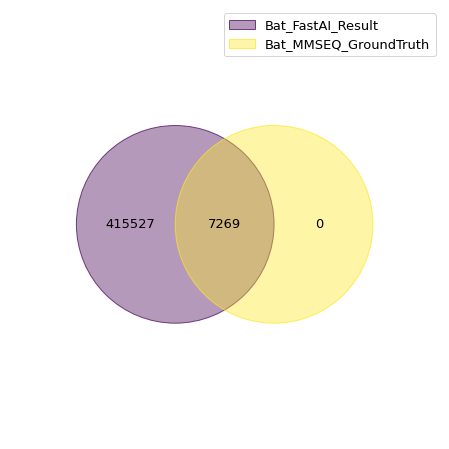

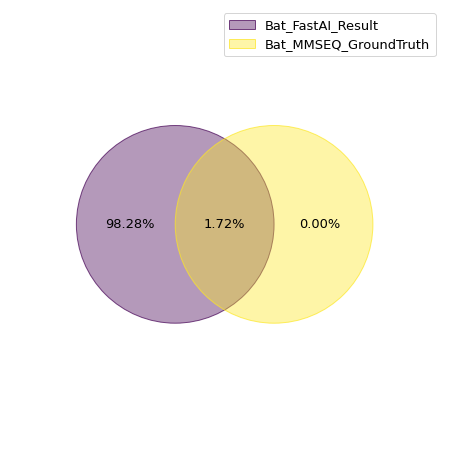

In [119]:
BatSamples = {
    "Bat_FastAI_Result":  set(Bat_ML["ID"]),
    "Bat_MMSEQ_GroundTruth": set(Bat_len10_truth['ID_Query']),
}
venn(BatSamples)
venn(BatSamples, fmt="{percentage:.2f}%")

<AxesSubplot:>

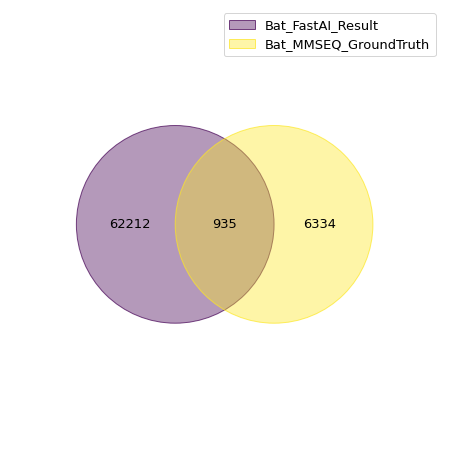

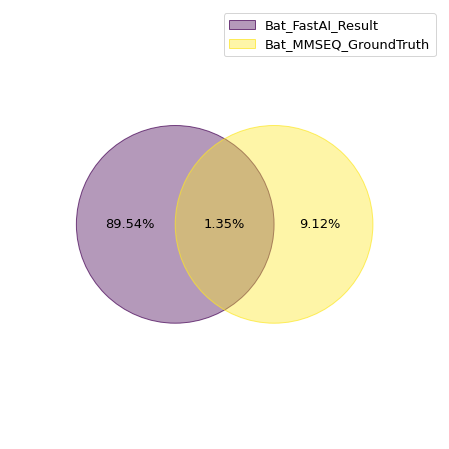

In [120]:
Bat_AMPs_ML= Bat_ML[Bat_ML["class"] == 0]
BatSamples = {
    "Bat_FastAI_Result":  set(Bat_AMPs_ML["ID"]),
    "Bat_MMSEQ_GroundTruth": set(Bat_len10_truth['ID_Query']),
}
venn(BatSamples)
venn(BatSamples, fmt="{percentage:.2f}%")

1635


<AxesSubplot:>

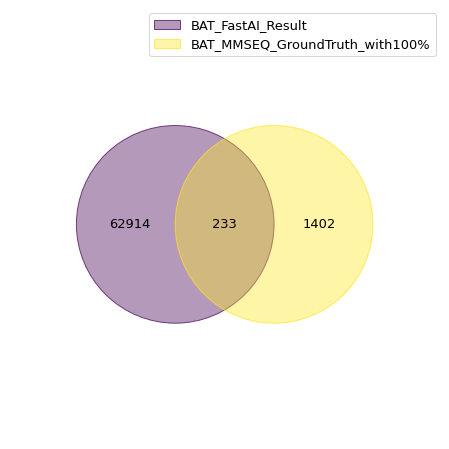

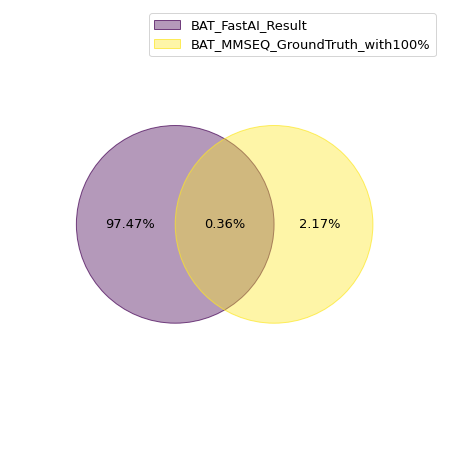

In [121]:
### 100% identity
filtered_BAT_len10_truth =Bat_len10_truth[Bat_len10_truth['sequence_identity'] == 1]
filtered_BAT_total_AMPS_with100 = len(filtered_BAT_len10_truth['ID_Query'].unique())
print(filtered_BAT_total_AMPS_with100)
BATSamples_100 = {
    "BAT_FastAI_Result":  set(Bat_AMPs_ML["ID"]),
    "BAT_MMSEQ_GroundTruth_with100%": set(filtered_BAT_len10_truth['ID_Query']),
}
venn(BATSamples_100)
venn(BATSamples_100, fmt="{percentage:.2f}%")

In [122]:
accuracy = (935/Bat_total_AMPS )*100
accuracy_100 = (233/filtered_BAT_total_AMPS_with100 )*100
print("Baseline: %.2f" % accuracy)
print("Filtered: %.2f" % accuracy_100)

Baseline: 12.86
Filtered: 14.25


In [ ]:
#------------------------------------#

## Red king 

In [143]:
red_ML =  pd.read_pickle("/mnt/vdb/RedKing/cd100/result/RedKing.len10.MLResult.plk")
red_ML

,ID,class
0,0,1
1,1,1
2,3,1
3,4,1
4,6,1
...,...,...
25,6492107,1
26,6492113,1
27,6492114,1
28,6492121,1


In [144]:
red_len10_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/RedKingCrab.alnRes.m8.len10.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
total_AMPS = len(red_len10_truth['ID_Query'].unique())
print(total_AMPS)
red_len10_truth

12051


,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,3935851,ADAM_4803|adam_test,0.308,171,118,0,40,210,15,185,7.452000e-15,71
1,3935851,dbAMP_04917,0.312,159,109,0,52,210,1,159,1.852000e-14,70
2,3935851,dbAMP_04918,0.306,159,110,0,52,210,1,159,2.085000e-13,67
3,3935851,ADAM_6560|adam_test,0.291,154,107,0,52,205,1,152,3.144000e-12,63
4,6228282,dbAMP_04918,0.309,137,92,0,25,161,1,134,2.359000e-10,57
...,...,...,...,...,...,...,...,...,...,...,...,...
46284,2890026,ADAM_4495|adam_test,0.382,68,40,0,9,74,110,177,2.252000e-11,56
46285,2890026,ADAM_4496|adam_test,0.318,69,45,0,9,75,111,179,6.265000e-08,46
46286,2702553,L03A000325|,0.350,57,36,0,257,313,1,57,3.864000e-08,53
46287,2702553,ADAM_6947|adam_test,0.350,57,35,0,257,313,1,55,3.657000e-07,49


<AxesSubplot:>

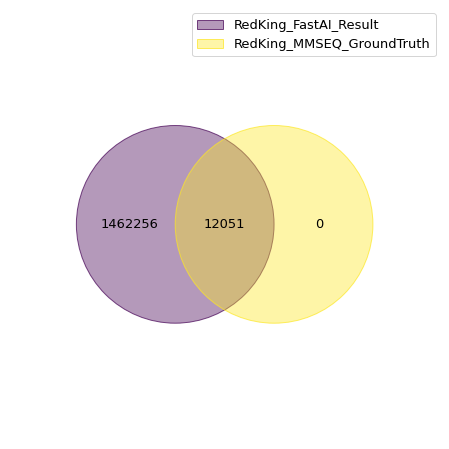

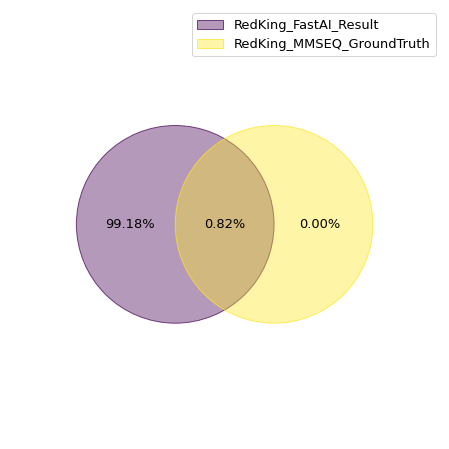

In [145]:
RedSamples = {
    "RedKing_FastAI_Result":  set(red_ML["ID"]),
    "RedKing_MMSEQ_GroundTruth": set(red_len10_truth['ID_Query']),
}
venn(RedSamples)
venn(RedSamples, fmt="{percentage:.2f}%")

<AxesSubplot:>

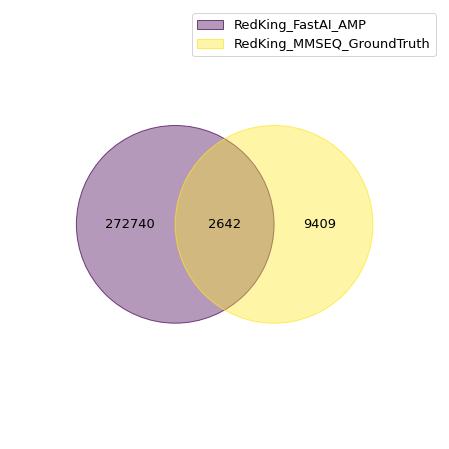

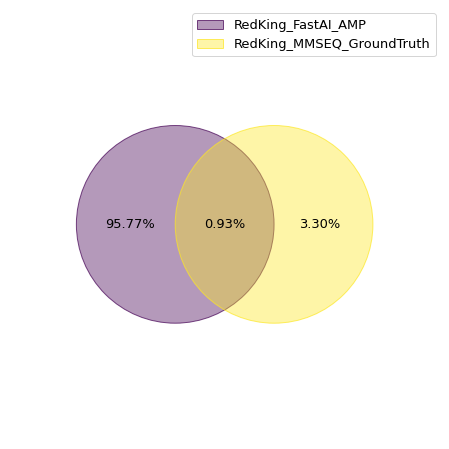

In [146]:
red_AMPs_ML= red_ML[red_ML["class"] == 0]
RedSamples = {
    "RedKing_FastAI_AMP":  set(red_AMPs_ML["ID"]),
    "RedKing_MMSEQ_GroundTruth": set(red_len10_truth['ID_Query']),
}
venn(RedSamples)
venn(RedSamples, fmt="{percentage:.2f}%")

679


<AxesSubplot:>

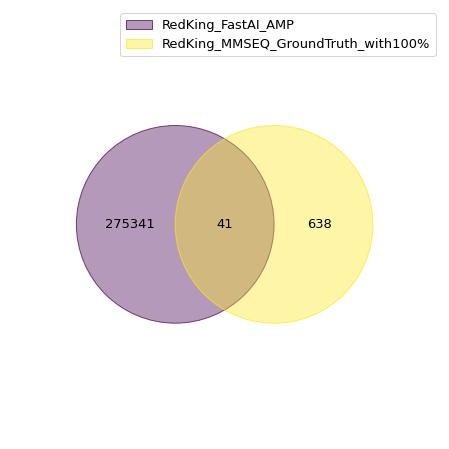

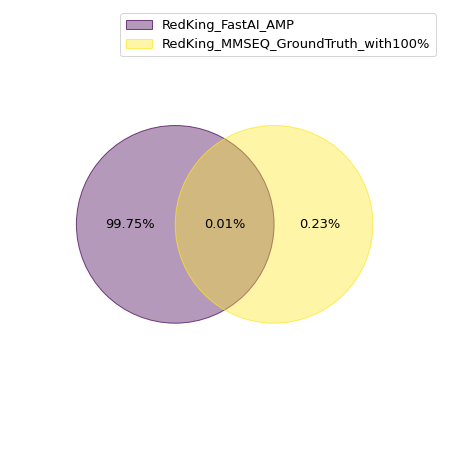

In [147]:
### 100% identity
filtered_red_len10_truth =red_len10_truth[red_len10_truth['sequence_identity'] == 1]
filtered_red_total_AMPS_with100 = len(filtered_red_len10_truth['ID_Query'].unique())
print(filtered_red_total_AMPS_with100)
RedSamples_100 = {
    "RedKing_FastAI_AMP":  set(red_AMPs_ML["ID"]),
    "RedKing_MMSEQ_GroundTruth_with100%": set(filtered_red_len10_truth['ID_Query']),
}
venn(RedSamples_100)
venn(RedSamples_100, fmt="{percentage:.2f}%")

In [148]:
accuracy = (2642/total_AMPS )*100
accuracy_100 = (41/filtered_red_total_AMPS_with100 )*100
print("Baseline: %.2f" % accuracy)
print("Filtered: %.2f" % accuracy_100)

Baseline: 21.92
Filtered: 6.04


In [ ]:
####################### ------------------- ####################################

## komodo

In [131]:
komodo_len10_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/Komodo.alnRes.m8.len10.tsv"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
total_AMPS = len(komodo_len10_truth['ID_Query'].unique())
print(total_AMPS)
komodo_ML =  pd.read_pickle("/mnt/vdb/komodo/cd100/result/komodo.len10.MLResult.plk")
komodo_ML

14675


,ID,class
0,34,1
1,38,0
2,59,0
3,61,1
4,69,1
...,...,...
33,34495360,1
34,34495366,1
35,34495367,1
36,34495419,1


In [132]:
komodo_ML[komodo_ML["class"] == 1]

,ID,class
0,34,1
3,61,1
4,69,1
5,74,1
6,82,1
...,...,...
33,34495360,1
34,34495366,1
35,34495367,1
36,34495419,1


<AxesSubplot:>

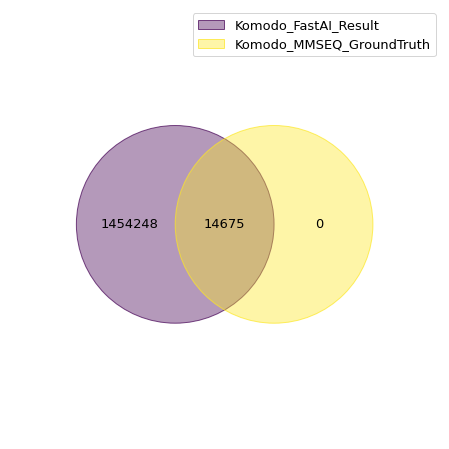

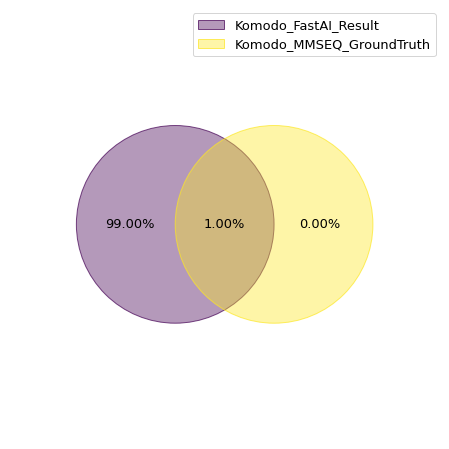

In [133]:
KomodoSamples = {
    "Komodo_FastAI_Result":  set(komodo_ML["ID"]),
    "Komodo_MMSEQ_GroundTruth": set(komodo_len10_truth['ID_Query']),
}
venn(KomodoSamples)
venn(KomodoSamples, fmt="{percentage:.2f}%")

<AxesSubplot:>

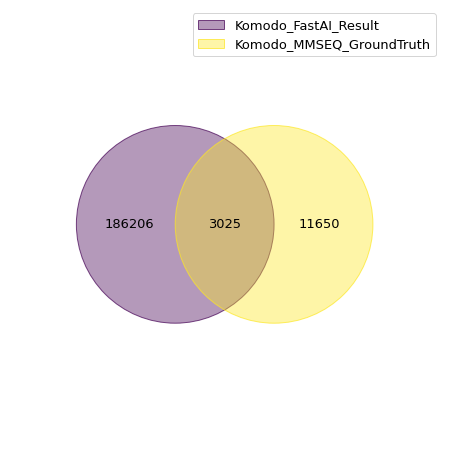

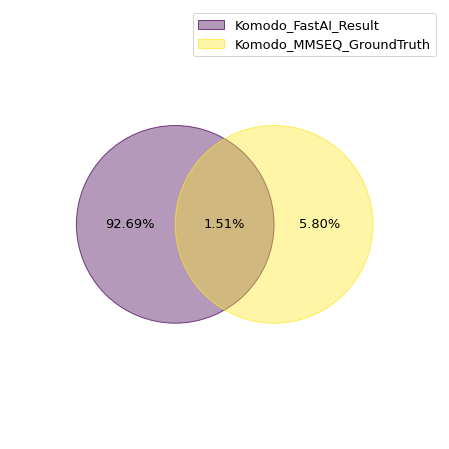

In [134]:
Komodo_AMPs_ML= komodo_ML[komodo_ML["class"] == 0]
KomodoSamples = {
    "Komodo_FastAI_Result":  set(Komodo_AMPs_ML["ID"]),
    "Komodo_MMSEQ_GroundTruth": set(komodo_len10_truth['ID_Query']),
}
venn(KomodoSamples)
venn(KomodoSamples, fmt="{percentage:.2f}%")

1223


<AxesSubplot:>

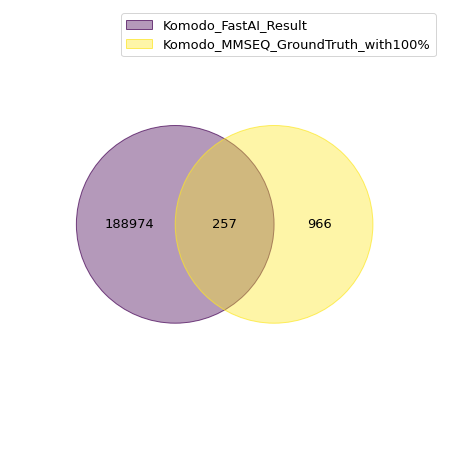

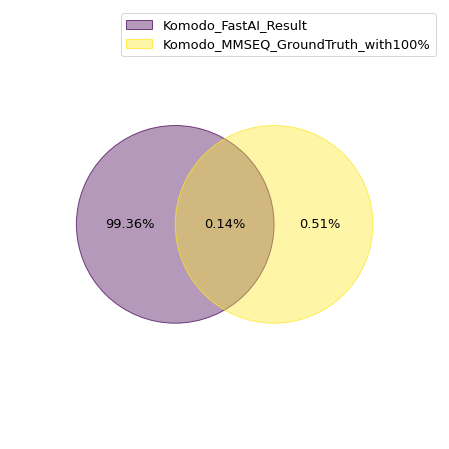

In [135]:
### 100% identity
filtered_komodo_len10_truth =komodo_len10_truth[komodo_len10_truth['sequence_identity'] == 1]
filtered_komodo_total_AMPS_with100 = len(filtered_komodo_len10_truth['ID_Query'].unique())
print(filtered_komodo_total_AMPS_with100)
komodoSamples_100 = {
    "Komodo_FastAI_Result":  set(Komodo_AMPs_ML["ID"]),
    "Komodo_MMSEQ_GroundTruth_with100%": set(filtered_komodo_len10_truth['ID_Query']),
}
venn(komodoSamples_100)
venn(komodoSamples_100, fmt="{percentage:.2f}%")

In [136]:
accuracy = (3025/total_AMPS )*100
accuracy_100 = (257/filtered_komodo_total_AMPS_with100 )*100
print("Baseline: %.2f" % accuracy)
print("Filtered: %.2f" % accuracy_100)

Baseline: 20.61
Filtered: 21.01


## Poison Frog

In [90]:
frog_len15_truth = pd.read_csv("/home/ubuntu/data/MMseqs.clus/output/poisonfrog.len15.alnRes.m8"
                                      ,encoding = "ISO-8859-1", sep='\t',header=0)
total_AMPS = len(frog_len15_truth['ID_Query'].unique())
print(total_AMPS)
frog_len15_truth

43602


,ID_Query,ID_Target,sequence_identity,alignment_length,number_of_mismatches,number_of_gap_openings,start-position_in_query,end-position_in_query,start-position_in_target,end-position_in_target,E-value,bit_score
0,10448297,dbAMP_10292,0.382,123,74,0,8,130,1,121,4.217000e-25,98
1,10448297,L01A002658|polyreactive,0.359,87,54,0,46,130,1,87,2.342000e-13,64
2,2811628,ADAM_4730|adam_test,0.704,44,13,0,2,45,77,120,5.831000e-14,64
3,2811628,576_dbaasp|dbaasp_peptides,0.727,44,12,0,2,45,77,120,7.993000e-14,64
4,2811628,ADAM_4731|adam_test,0.727,44,12,0,2,45,78,121,7.993000e-14,64
...,...,...,...,...,...,...,...,...,...,...,...,...
231441,3273154,L01A002287|Sequence,0.395,79,46,0,87,165,5,81,1.292000e-06,45
231442,3273154,L01A002282|Sequence,0.325,83,51,0,83,165,6,81,3.181000e-06,44
231443,3273154,L01A002288|Sequence,0.313,83,52,0,83,165,6,81,1.055000e-05,42
231444,3273154,L01A002289|Sequence,0.307,78,49,0,84,161,11,81,2.586000e-05,41


In [91]:
frog_ML =  pd.read_pickle("/mnt/vdb/PoisonFrog/cd100/results/PoisonFrog.len15.MLResult.plk")
frog_ML

,ID,class
0,0,1
1,8,1
2,10,1
3,15,1
4,18,0
...,...,...
285,12753702,1
286,12753704,1
287,12753708,1
288,12753717,0


In [92]:
frog_ML[frog_ML["class"] == 1]

,ID,class
0,0,1
1,8,1
2,10,1
3,15,1
5,19,1
...,...,...
284,12753700,1
285,12753702,1
286,12753704,1
287,12753708,1


<AxesSubplot:>

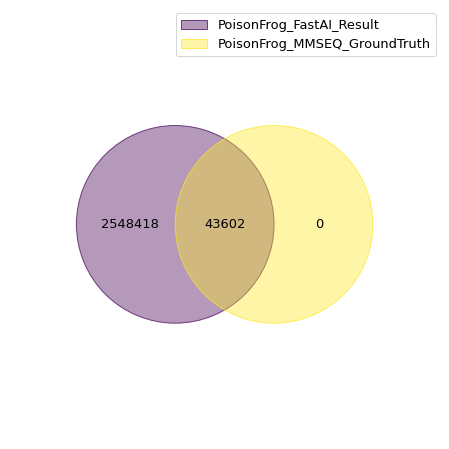

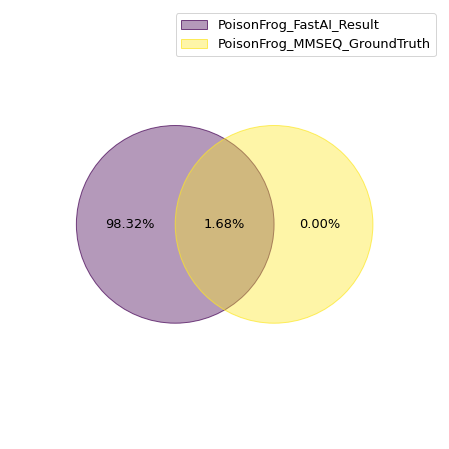

In [93]:
FrogSamples = {
    "PoisonFrog_FastAI_Result":  set(frog_ML["ID"]),
    "PoisonFrog_MMSEQ_GroundTruth": set(frog_len15_truth['ID_Query']),
}
venn(FrogSamples)
venn(FrogSamples, fmt="{percentage:.2f}%")

In [ ]:
# in case of 0 in yellow means all AMPs in a sample match to all AMPs from our non-redundant AMP database 
# which is quite good, but if we focus on AMP class only, there is a false negative (e.g.,it is AMP but model predicts NonAMPs)

<AxesSubplot:>

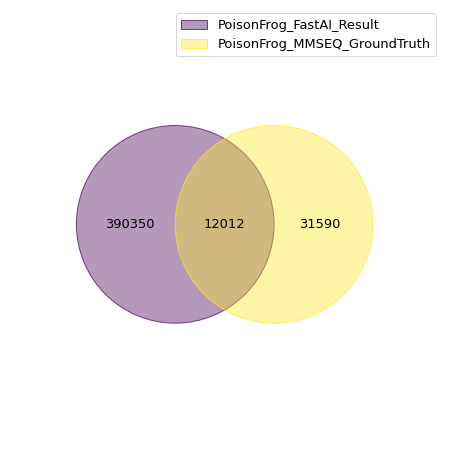

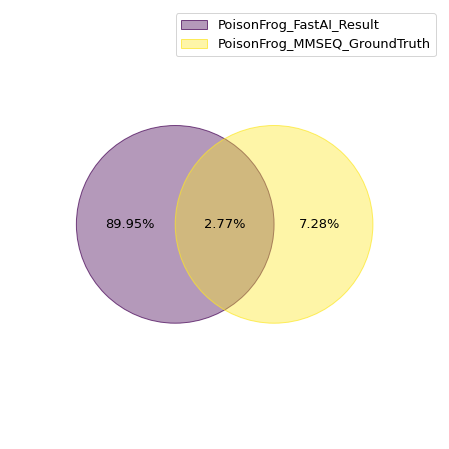

In [94]:
frog_AMPs_ML= frog_ML[frog_ML["class"] == 0]
FrogSamples = {
    "PoisonFrog_FastAI_Result":  set(frog_AMPs_ML["ID"]),
    "PoisonFrog_MMSEQ_GroundTruth": set(frog_len15_truth['ID_Query']),
}
venn(FrogSamples)
venn(FrogSamples, fmt="{percentage:.2f}%")

2248


<AxesSubplot:>

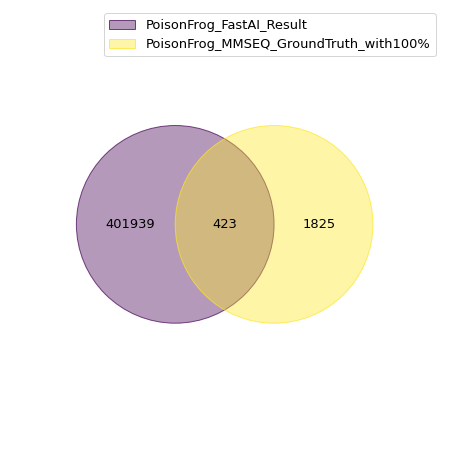

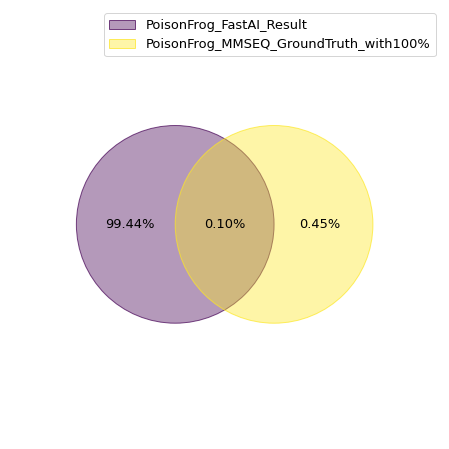

In [86]:
### 100% identity
filtered_frog_len15_truth =frog_len15_truth[frog_len15_truth['sequence_identity'] == 1]
filtered_frog_total_AMPS_with100 = len(filtered_frog_len15_truth['ID_Query'].unique())
print(filtered_frog_total_AMPS_with100)
FrogSamples_100 = {
    "PoisonFrog_FastAI_Result":  set(frog_AMPs_ML["ID"]),
    "PoisonFrog_MMSEQ_GroundTruth_with100%": set(filtered_frog_len15_truth['ID_Query']),
}
venn(FrogSamples_100)
venn(FrogSamples_100, fmt="{percentage:.2f}%")

In [87]:
accuracy = (12012/total_AMPS )*100
accuracy_100 = (423/filtered_frog_total_AMPS_with100 )*100
print("Baseline: %.2f" % accuracy)
print("Filtered: %.2f" % accuracy_100)

Baseline: 27.55
Filtered: 18.82


In [ ]:
# -------------------@